# 練習預測鐵達尼號存活率

# 資料清理

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
df = pd.concat([train,test],axis=0)
#Survival: 0 = No, 1 = Yes

In [2]:
print(df.columns.values) #印出標題列
print(len(df))
print(df.head()) #查看訓練資料
print(df.info()) #查看訓練資料型態
print(df.describe()) #查看資料數值資料

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
1309
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        

In [3]:
df['Sex'] = pd.Categorical(df['Sex']).codes #將性別一欄轉為數字類別以計算

In [6]:
df.groupby(df["Embarked"]).count() #Embarked 的缺失值可以用最多人的 "S " 填補
df["Embarked"]=df.Embarked.fillna("S")
df['Embarked'] = pd.Categorical(df['Embarked']).codes #將Embarked一欄轉為數字類別以計算
df.groupby(df["Embarked"]).count() #C:0;Q:1;S:2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
0,270,168,270,270,270,212,270,270,270,270,118
1,123,77,123,123,123,50,123,123,123,123,5
2,916,646,916,916,916,784,916,916,916,915,172


In [376]:
# Cabin 的缺失值，應該可以用 Pclass 來呼應處理

In [379]:
print(df.Cabin.value_counts()) #先看Cabin 資料集的分佈

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
F4                 4
                  ..
C110               1
E12                1
B79                1
B37                1
D50                1
Name: Cabin, Length: 186, dtype: int64


In [7]:
#計算一下分布是不是跟文獻類似
print("A:",sum((df["Cabin"].str.contains('A', regex=False))==True)) #First Class, accommodation for 48 people.
print("B:",sum((df["Cabin"].str.contains('B', regex=False))==True)) #First Class, accomodation for 183 passengers.
print("C:",sum((df["Cabin"].str.contains('C', regex=False))==True)) #First Class,accommodate 315 passengers. total 553, sum 182
print("D:",sum((df["Cabin"].str.contains('D', regex=False))==True)) #Second Class, accommodate 119 passengers.
print("E:",sum((df["Cabin"].str.contains('E', regex=False))==True)) #Second Class,accommodate 184 passengers. total 303, sum 90
print("F:",sum((df["Cabin"].str.contains('F', regex=False))==True)) #third class
print("G:",sum((df["Cabin"].str.contains('G', regex=False))==True)) #third class, sum 30
print("T:",sum((df["Cabin"].str.contains('T', regex=False))==True)) #First Class, accommodation for 7 people.
#Reference---> https://www.encyclopedia-titanica.org/cabins.html
#決定用 Pclass 填補缺失值

A: 22
B: 65
C: 94
D: 46
E: 44
F: 21
G: 9
T: 1


In [8]:
df["Pclass"] = df["Pclass"].astype(str)
mapping_dict = dict({"1":"C23 C25 C27","2":"E12",'3':"G6"})
df["Cabin"]= df["Cabin"].fillna(df["Pclass"].apply(lambda x: mapping_dict.get(x)))
df["Pclass"] = df["Pclass"].astype(int)

In [10]:
#現在的分布比較正常
print("A:",sum((df["Cabin"].str.contains('A', regex=False))==True)) #First Class, accommodation for 48 people.
print("B:",sum((df["Cabin"].str.contains('B', regex=False))==True)) #First Class, accomodation for 183 passengers.
print("C:",sum((df["Cabin"].str.contains('C', regex=False))==True)) #First Class,accommodate 315 passengers. total 553, sum 182
print("D:",sum((df["Cabin"].str.contains('D', regex=False))==True)) #Second Class, accommodate 119 passengers.
print("E:",sum((df["Cabin"].str.contains('E', regex=False))==True)) #Second Class,accommodate 184 passengers. total 303, sum 90
print("F:",sum((df["Cabin"].str.contains('F', regex=False))==True)) #third class
print("G:",sum((df["Cabin"].str.contains('G', regex=False))==True)) #third class, sum 30
print("T:",sum((df["Cabin"].str.contains('T', regex=False))==True)) #First Class, accommodation for 7 people.

A: 22
B: 65
C: 161
D: 46
E: 298
F: 21
G: 702
T: 1


In [12]:
mask=df["Fare"].isnull() #Pclass=3, use average to fillna
df[mask]
mask=df["Pclass"]=="3"
#print((df["Fare"][mask]).descrie())
df["Fare"]=df.Fare.fillna(33.295479)

In [13]:
mask=df["Age"].isnull()
df_age_null=df[mask]#嘗試用姓名中的稱謂來填補缺失值

In [14]:
#計算稱謂平均年齡
for dataset in df:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Age'])

Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,...,64.00,65.00,66.00,67.00,70.00,70.50,71.00,74.00,76.00,80.00
Title,,,,,,,,,,,,,,,,,,,,,
Capt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Col,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Countess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Don,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jonkheer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lady,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Major,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#稱謂太亂了，統一一下
for dataset in df:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
pd.crosstab(df['Title'], df['Age'])

Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,...,64.00,65.00,66.00,67.00,70.00,70.50,71.00,74.00,76.00,80.00
Title,,,,,,,,,,,,,,,,,,,,,
Master,0,1,1,1,1,3,1,5,5,4,...,0,0,0,0,0,0,0,0,0,0
Miss,1,0,0,0,2,0,1,5,7,3,...,0,0,0,0,0,0,0,0,0,0
Mr,0,0,0,0,0,0,0,0,0,0,...,3,3,1,1,1,1,2,1,0,1
Mrs,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0
Rare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
#計算平均年齡
df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,Master,5.482642
1,Miss,21.824366
2,Mr,32.252151
3,Mrs,36.918129
4,Rare,45.178571


In [17]:
mapping_dict = dict({"Master":"5","Miss":"21","Mr":"32","Mrs":"37","Rare":"45"})
df["Age"]= df["Age"].fillna(df["Title"].apply(lambda x: mapping_dict.get(x)))
df["Age"] = df["Age"].astype(float)

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G6,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G6,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,32.0,0,0,A.5. 3236,8.0500,G6,2,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0,Rare
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,G6,2,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",1,32.0,0,0,359309,8.0500,G6,2,Mr


In [19]:
df.info() #資料清理完成

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int8   
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   int8   
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), int8(2), object(4)
memory usage: 125.3+ KB


In [ ]:
df.to_csv("data.csv",encoding="utf-8",index=False) #保險起見存檔

# 資料繪圖

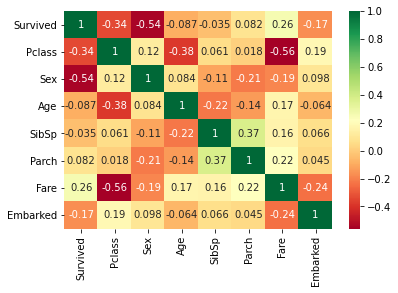

In [49]:
import seaborn as sns
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
titainic_df=df[["Survived", "Pclass", "Sex", "Age","SibSp","Parch","Fare","Embarked"]] #預計將上述因子計入預測
titanic_corr(titainic_df)#Cabin 呼應 Pclass，故不列入

## 畫圖看一下Age跟存活的關係性

In [20]:
import matplotlib.pyplot as plt

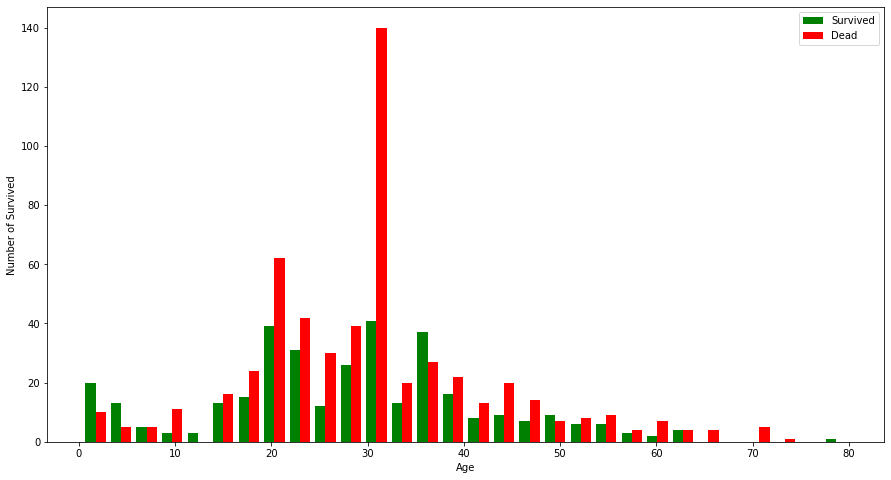

In [21]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df["Survived"]==1]["Age"], df[df["Survived"]==0]["Age"]], stacked=False, color = ["g","r"], bins = 30,label = ["Survived","Dead"])
plt.xlabel("Age")
plt.ylabel("Number of Survived")
plt.legend()

## 畫圖看一下Pclass跟存活的關係性

Text(0, 0.5, 'Number of Pclass')

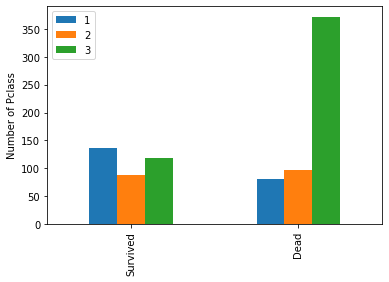

In [57]:
survived_pclass = df[df["Survived"]==1]["Pclass"].value_counts()
dead_pclass = df[df["Survived"]==0]["Pclass"].value_counts()
df_survived_versus_pclass = pd.DataFrame([survived_pclass,dead_pclass])
df_survived_versus_pclass.index = ["Survived","Dead"]
df_survived_versus_pclass.plot(kind="bar",stacked=False)
plt.ylabel("Number of Pclass")

## 畫圖看一下Gender跟存活的關係性

Text(0, 0.5, 'Number of Gender')

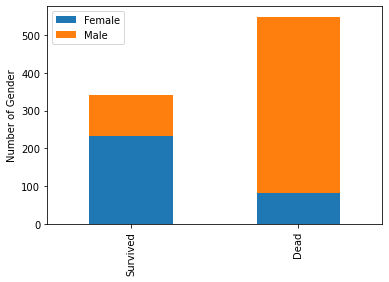

In [56]:
survived_gender = df[df["Survived"]==1]["Sex"].value_counts()
dead_gender = df[df["Survived"]==0]["Sex"].value_counts()
df_survived_versus_gender = pd.DataFrame([survived_gender,dead_gender])
df_survived_versus_gender.index = ["Survived","Dead"]
fig, ax = plt.subplots()
df_survived_versus_gender.plot(kind="bar",stacked=True,ax=ax)
ax.legend(["Female","Male"]);
plt.ylabel("Number of Gender")

## 畫圖看一下Embarked跟存活的關係性

Text(0, 0.5, 'Number of Pclass')

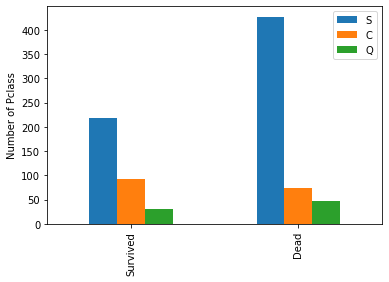

In [55]:
survived_embarked = df[df["Survived"]==1]["Embarked"].value_counts()
dead_embarked = df[df["Survived"]==0]["Embarked"].value_counts()
df_survived_versus_embarked = pd.DataFrame([survived_embarked,dead_embarked])
df_survived_versus_embarked.index = ["Survived","Dead"]
fig, ax = plt.subplots()
df_survived_versus_embarked.plot(kind="bar",stacked=False,ax=ax)
ax.legend(["S","C","Q"]);#C:0;Q:1;S:2
plt.ylabel("Number of Pclass")

## 畫圖看一下Fare跟存活的關係性

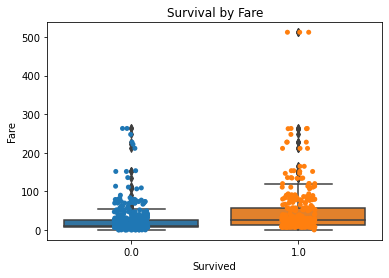

In [53]:
ax = sns.boxplot(x="Survived", y="Fare", 
                data=df)
ax = sns.stripplot(x="Survived", y="Fare",
                   data=df, jitter=True,
                   edgecolor="gray")
plt.title("Survival by Fare",fontsize=12);

# 機器學習
## 拿 Gender, Age, Pclass ,Fare, Embarked 等因子開始做機器學習

In [58]:
mask3=df["Survived"].isnull()
mask4=df["Survived"].notnull()
df_test=df[mask3]
df_train=df[mask4]

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Importing dataset

df_train=df_train[["Survived", "Pclass", "Sex", "Age","Fare", "Embarked"]] 

In [60]:
#Naive Bayes
X_train, X_test = train_test_split(df_train, test_size=0.7)

gnb = GaussianNB()
used_features =[
    "Pclass",
    "Sex",
    "Age",
    "Fare",
    "Embarked"
]

# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["Survived"]
)
y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

accuracy = accuracy_score(X_test["Survived"], y_pred)
num_correct_samples = accuracy_score(X_test["Survived"], y_pred, normalize=False)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

Number of mislabeled points out of a total 624 points : 140, performance 77.56%
number of correct sample: 484
accuracy: 0.7756410256410257


In [61]:
# 使用 naive_bayes 得到 0.77 的準確率。